# Artefacts Analysis

16 Participants performed a mission specification using a top-down and bottom-up approach. Participants were equally divided into two groups:

- Group 1 started with a top-down approach and then performed the bottom-up approach;
- Group 2 started with the bottom-up and then performed the top-down approach.

Our analysis consists of cleaning and plotting the data:
- Cleaning: We replace the 0, 5 and 10 values from each column of the criteria with 1,2,3 to improve legibility. Also, we removed the columns "TOTAL", "IDs" and "MISSION" for the plotting.
- Plotting: We plot using the likert_plot so we're able to see the percentage of each value per criteria.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import plot_likert

/home/v/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


## Bottom-Up Analysis

In [2]:
df1 = pd.read_csv("bt_deliver_goods.csv")
df1["Mission"] = "deliver_goods"

df2 = pd.read_csv("bt_food_logistics.csv")
df2["Mission"] = "food_logistics"
room1 = ['G101','G102','G103','G104','G301','G302','G303','G304']
room2 = ['G401','G402','G403','G404','G201','G202','G203','G204']

# We need the bottomup from the room1
mask_room1 = df1["IDs"].isin(room1)

# We need the bottomup from the room1
mask_room2 = df2["IDs"].isin(room2)

deliver_goods_g2 = df1.loc[~mask_room1]
food_logistics_g1 = df2.loc[~mask_room2]

bu_df = pd.concat([deliver_goods_g2, food_logistics_g1]).replace(np.nan, 0).iloc[:, [0, 1, 2, 4, 3, 5, 6]]

In [3]:
bottom_up = bu_df.melt(id_vars=["Mission", "IDs", "Total"], var_name="Quality", value_name="Value")
bottom_up["specification"] = "bottom_up"
bottom_up

,Mission,IDs,Total,Quality,Value,specification
0,deliver_goods,G201,0.00,Adequate,0.0,bottom_up
1,deliver_goods,G202,0.00,Adequate,0.0,bottom_up
2,deliver_goods,G203,5.00,Adequate,5.0,bottom_up
3,deliver_goods,G204,0.00,Adequate,0.0,bottom_up
4,deliver_goods,G401,10.00,Adequate,10.0,bottom_up
...,...,...,...,...,...,...
59,food_logistics,G104,3.75,Comprehensible,0.0,bottom_up
60,food_logistics,G301,10.00,Comprehensible,10.0,bottom_up
61,food_logistics,G302,2.50,Comprehensible,5.0,bottom_up
62,food_logistics,G303,1.25,Comprehensible,0.0,bottom_up


In [4]:
likert_color = ["#ffffff00","#d8a539", "lightgray", "#5ab4ac"]
categories = ["Not Met", "Partially Met", "Fully Met"]
bu_cleaned_ids = bu_df.drop(columns=["Mission", "Total"])
bu_cleaned = bu_df.drop(columns=["IDs", "Total"])
bu_cleaned = bu_cleaned.drop(columns=["Mission"])
bu_cleaned

,Adequate,Complete,Verifiable,Comprehensible
4,0,0.0,0.0,0.0
5,0,0.0,0.0,0.0
6,5,5.0,5.0,5.0
7,0,0.0,0.0,0.0
12,10,10.0,10.0,10.0
13,10,5.0,5.0,5.0
14,10,10.0,10.0,10.0
15,0,0.0,5.0,5.0
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0


Text(0.5, 1.0, 'Bottom-Up Artefact Evaluation')

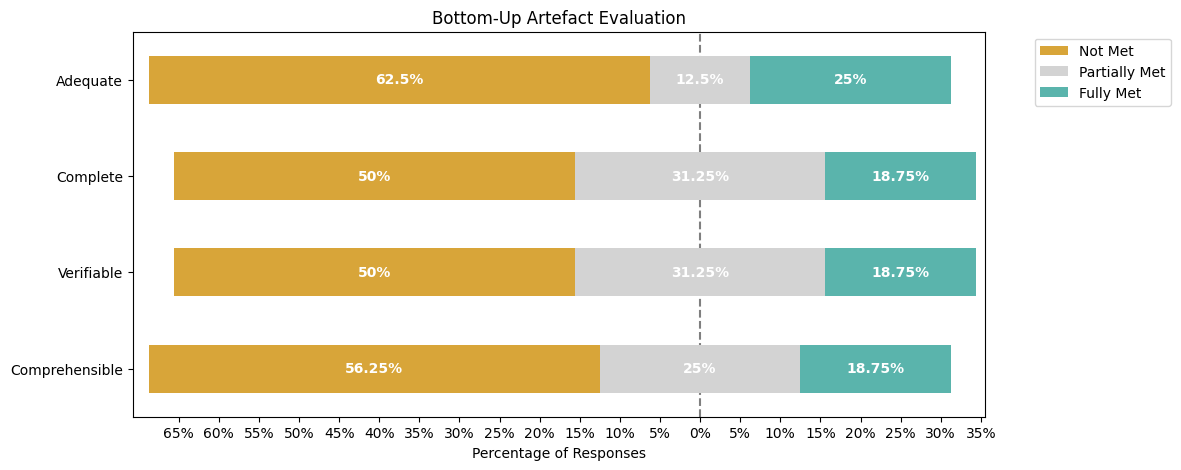

In [5]:
ax1 = plot_likert.plot_likert(bu_cleaned.replace([0,5,10], categories), categories, plot_percentage=True, colors=likert_color, figsize=(11,5),bar_labels=True)
ax1.set_title('Bottom-Up Artefact Evaluation')

## Top-Down Analysis

In [6]:
top_down = pd.read_csv("goal_model.csv")
top_down

,IDs,Mission,Adequate,Complete,Verifiable,Comprehensible,Total
0,G101,food_logistics,5,0,0,5,"12,5"
1,G102,food_logistics,10,5,0,10,"31,25"
2,G103,food_logistics,5,0,0,10,"18,75"
3,G104,food_logistics,0,0,0,0,0
4,G201,deliver_goods,10,0,0,10,25
5,G202,deliver_goods,5,0,0,10,"18,75"
6,G203,deliver_goods,5,0,0,10,"18,75"
7,G204,deliver_goods,0,0,0,0,0
8,G301,food_logistics,5,0,0,5,"12,5"
9,G302,food_logistics,5,0,0,5,"12,5"


In [7]:
likert_color = ["#ffffff00","#d8a539", "lightgray", "#5ab4ac"]

top_down_ids = top_down.drop(columns=["Total", "Mission"])
top_down_cleaned = top_down.drop(columns=["IDs", "Total", "Mission"])
top_down_cleaned

,Adequate,Complete,Verifiable,Comprehensible
0,5,0,0,5
1,10,5,0,10
2,5,0,0,10
3,0,0,0,0
4,10,0,0,10
5,5,0,0,10
6,5,0,0,10
7,0,0,0,0
8,5,0,0,5
9,5,0,0,5


Text(0.5, 1.0, 'Top-Down Artefact Evaluation')

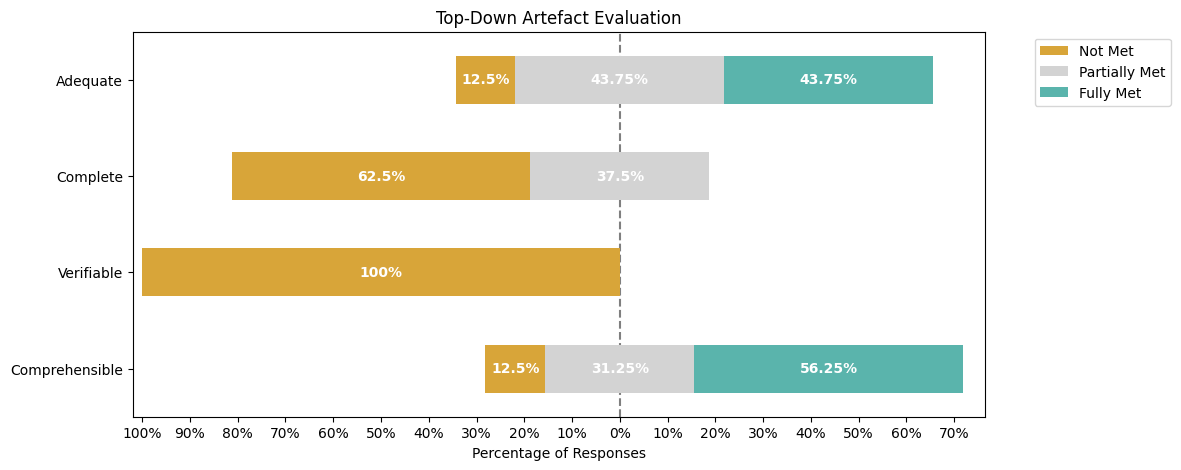

In [8]:
ax1 = plot_likert.plot_likert(top_down_cleaned.replace([0,5,10], categories), categories, plot_percentage=True, colors=likert_color, figsize=(11,5),bar_labels=True)
ax1.set_title('Top-Down Artefact Evaluation')

In [9]:
bu_cleaned["specification"] = "bottom-up"
top_down_cleaned["specification"] = "top-down"
df3 = pd.concat([top_down_cleaned, bu_cleaned])
df3 = df3.melt(id_vars="specification", var_name="Quality", value_name="Value")
df3

,specification,Quality,Value
0,top-down,Adequate,5.0
1,top-down,Adequate,10.0
2,top-down,Adequate,5.0
3,top-down,Adequate,0.0
4,top-down,Adequate,10.0
...,...,...,...
123,bottom-up,Comprehensible,0.0
124,bottom-up,Comprehensible,10.0
125,bottom-up,Comprehensible,5.0
126,bottom-up,Comprehensible,0.0


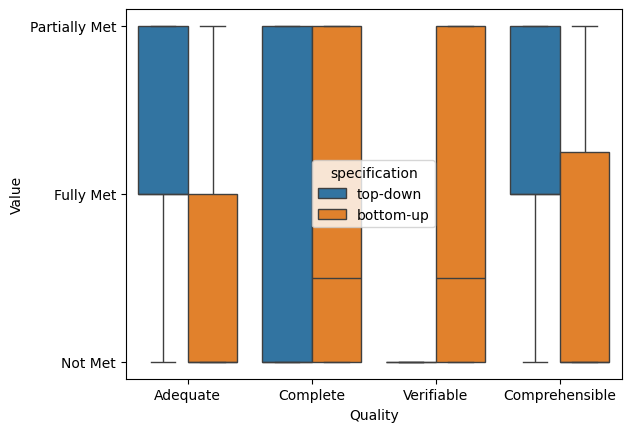

In [10]:
p = sns.boxplot(data=df3.replace([0,5,10], categories), x="Quality", y="Value", hue="specification")

/tmp/ipykernel_3666/3699742871.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p.set_xticklabels(["Adequacy", "Completeness", "Verifiability", "Comprehensibility"])


<Axes: xlabel='Quality', ylabel='Value'>

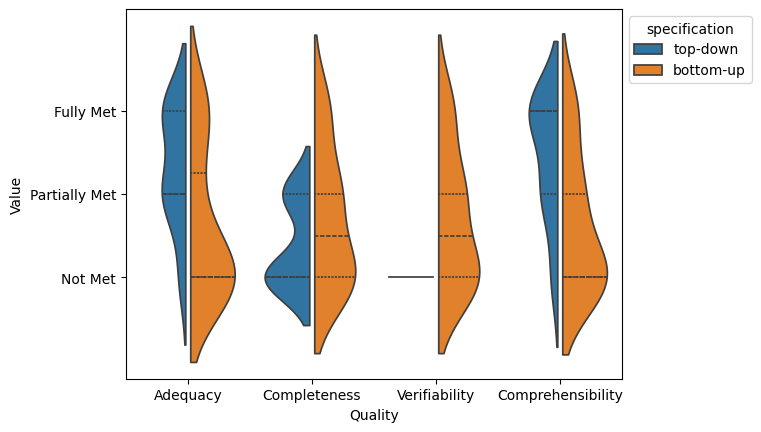

In [11]:
p=sns.violinplot(data=df3, x="Quality", y="Value", hue="specification", split=True, gap=.1, inner="quart")
p.set_yticks([0,5,10])
p.set_yticklabels(categories)
p.set_xticklabels(["Adequacy", "Completeness", "Verifiability", "Comprehensibility"])
sns.move_legend(p, "upper left", bbox_to_anchor=(1, 1))
p

# Wilcoxon

In [12]:
df3["Value"] /= 10
df3

,specification,Quality,Value
0,top-down,Adequate,0.5
1,top-down,Adequate,1.0
2,top-down,Adequate,0.5
3,top-down,Adequate,0.0
4,top-down,Adequate,1.0
...,...,...,...
123,bottom-up,Comprehensible,0.0
124,bottom-up,Comprehensible,1.0
125,bottom-up,Comprehensible,0.5
126,bottom-up,Comprehensible,0.0


In [13]:
top_down_cleaned.drop(columns=["specification"], inplace=True)
bu_cleaned.drop(columns=["specification"], inplace=True)

top_down_cleaned /= 10
bu_cleaned /= 10

# Statistical Analysis of Target Qualities

In [14]:
stats.wilcoxon(top_down_cleaned["Adequate"], bu_cleaned["Adequate"], zero_method="zsplit", alternative="greater")

WilcoxonResult(statistic=np.float64(110.5), pvalue=np.float64(0.012876916577929979))

In [15]:
stats.wilcoxon(top_down_cleaned["Complete"], bu_cleaned["Complete"], zero_method="zsplit", alternative="two-sided")

WilcoxonResult(statistic=np.float64(47.0), pvalue=np.float64(0.26829851846199326))

In [16]:
stats.wilcoxon(top_down_cleaned["Verifiable"], bu_cleaned["Verifiable"], zero_method="zsplit", alternative="less")

WilcoxonResult(statistic=np.float64(18.0), pvalue=np.float64(0.004226695600646726))

In [17]:
stats.wilcoxon(top_down_cleaned["Comprehensible"], bu_cleaned["Comprehensible"], zero_method="zsplit", alternative="greater")

WilcoxonResult(statistic=np.float64(119.5), pvalue=np.float64(0.0034449583669153177))

In [18]:
bottom_up

,Mission,IDs,Total,Quality,Value,specification
0,deliver_goods,G201,0.00,Adequate,0.0,bottom_up
1,deliver_goods,G202,0.00,Adequate,0.0,bottom_up
2,deliver_goods,G203,5.00,Adequate,5.0,bottom_up
3,deliver_goods,G204,0.00,Adequate,0.0,bottom_up
4,deliver_goods,G401,10.00,Adequate,10.0,bottom_up
...,...,...,...,...,...,...
59,food_logistics,G104,3.75,Comprehensible,0.0,bottom_up
60,food_logistics,G301,10.00,Comprehensible,10.0,bottom_up
61,food_logistics,G302,2.50,Comprehensible,5.0,bottom_up
62,food_logistics,G303,1.25,Comprehensible,0.0,bottom_up


In [19]:
top_down_ids
td_room1 = top_down_ids[top_down_ids["IDs"].isin(room1)].drop(columns="IDs")
td_room2 = top_down_ids[top_down_ids["IDs"].isin(room2)].drop(columns="IDs")
td_room1

,Adequate,Complete,Verifiable,Comprehensible
0,5,0,0,5
1,10,5,0,10
2,5,0,0,10
3,0,0,0,0
8,5,0,0,5
9,5,0,0,5
10,10,5,0,10
11,10,0,0,10


In [20]:
bu_room1 = bu_cleaned_ids[bu_cleaned_ids["IDs"].isin(room1)].drop(columns="IDs")
bu_room2 = bu_cleaned_ids[bu_cleaned_ids["IDs"].isin(room2)].drop(columns="IDs")
bu_room1

,Adequate,Complete,Verifiable,Comprehensible
0,0,0.0,0.0,0.0
1,0,0.0,0.0,0.0
2,0,0.0,0.0,0.0
3,5,5.0,5.0,0.0
8,10,10.0,10.0,10.0
9,0,0.0,5.0,5.0
10,0,5.0,0.0,0.0
11,0,5.0,0.0,0.0


# Effect of group order in Target Quality Results

In [21]:
_, p_values = stats.ranksums(bu_room1, bu_room2)
p_values

array([0.34456237, 0.83363488, 0.37202934, 0.22714668])

In [22]:
_, p_values = stats.ranksums(td_room1, td_room2)
p_values

array([0.71319126, 0.40081417, 1.        , 0.71319126])